In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
import re
import os
import xml.etree.ElementTree as ET

from visuals import *

/Users/mattevanoff/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mattevanoff/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [15]:
def get_structed_data(data_path):
    all_data = {}
    for filename in glob(data_path):
        tree = ET.parse(filename)
        root = tree.getroot()
        tmp = []
        for part in root.findall('machine-printed-part'):
            for line in part.findall('machine-print-line'):
                tmp.append(line.attrib['text'].rstrip())
        all_data[filename.split('/')[-1].split('.')[0]] = [tmp]
    return all_data

def create_dataframe(all_data):
    dat = pd.DataFrame(all_data).T.reset_index()
    dat.columns = ['filename', 'meta']
    dat['folder'] = dat.filename.map(lambda x: x.split('-')[0])
    dat['meta'] = dat.meta.map(lambda x: np.array([i.replace('&quot;', '"').replace("n't", "not") for i in x]))
#     print(dat.filename)
    dat['document'] = dat.filename.map(lambda x: re.sub(r'[A-Za-z]', '', x.split('-')[-1]))
    dat['document'] = dat['folder'] + '-' + dat['document']
    return dat

In [16]:
data_path = '../../data/raw/xml/*'
all_data = get_structed_data(data_path)
dat = create_dataframe(all_data)
# # to CSV 
# dat.to_csv('../../data/preprocessed/meta.csv', index=False)
# dat.to_json('../../data/preprocessed/meta_json.csv')

In [60]:
dat.iloc[2].meta

array(['"Oh, she was due!" And then he added in the same casual tone, "She\'s not returning',
       "to her family. She's going to live with friends of the bank manager, just this side of",
       'Belleray." Mrs. Deane made a suitable comment, but Beryl said nothing. She was',
       'trying to sort things out in her mind. That beneath his unnaturally smooth exterior',
       'Piers was simmering with anger against her she had no doubt.'],
      dtype='<U86')

In [39]:
x = '"Oh, she was due!" And then he added in the same casual tone, "She\'s not returning'

re.sub("\'s" , "'s", x)

'"Oh, she was due!" And then he added in the same casual tone, "She\'s not returning'

# EDA

In [161]:
unique = dat.drop_duplicates(subset=['document'], keep='last')

In [164]:
unique.head()

filename                                               meta folder  \
1   a01-000x  [A MOVE to stop Mr. Gaitskell from nominating ...    a01   
4   a01-003x  [Though they may gather some Left-wing support...    a01   
7   a01-007x  [Since 1958, 13 Labour life Peers and Peeresse...    a01   
10  a01-011x  [Delegates from Mr. Kenneth Kaunda's United Na...    a01   
13  a01-014x  [Sir Roy's United Federal Party is boycotting ...    a01   

   document  
1   a01-000  
4   a01-003  
7   a01-007  
10  a01-011  
13  a01-014

In [240]:
from nltk.tokenize import word_tokenize
from collections import Counter
from tqdm import tqdm_notebook

all_tokens = Counter()
all_lower_tokens = Counter()
all_chars = Counter()
all_lower_chars = Counter()

for row in unique.meta:
    tokens = (word_tokenize(row[0]))
    for token in tokens:
        all_tokens[token] += 1
        all_lower_tokens[token.lower()] += 1
        for char in token:
            all_chars[char] += 1
            all_lower_chars[char.lower()] += 1

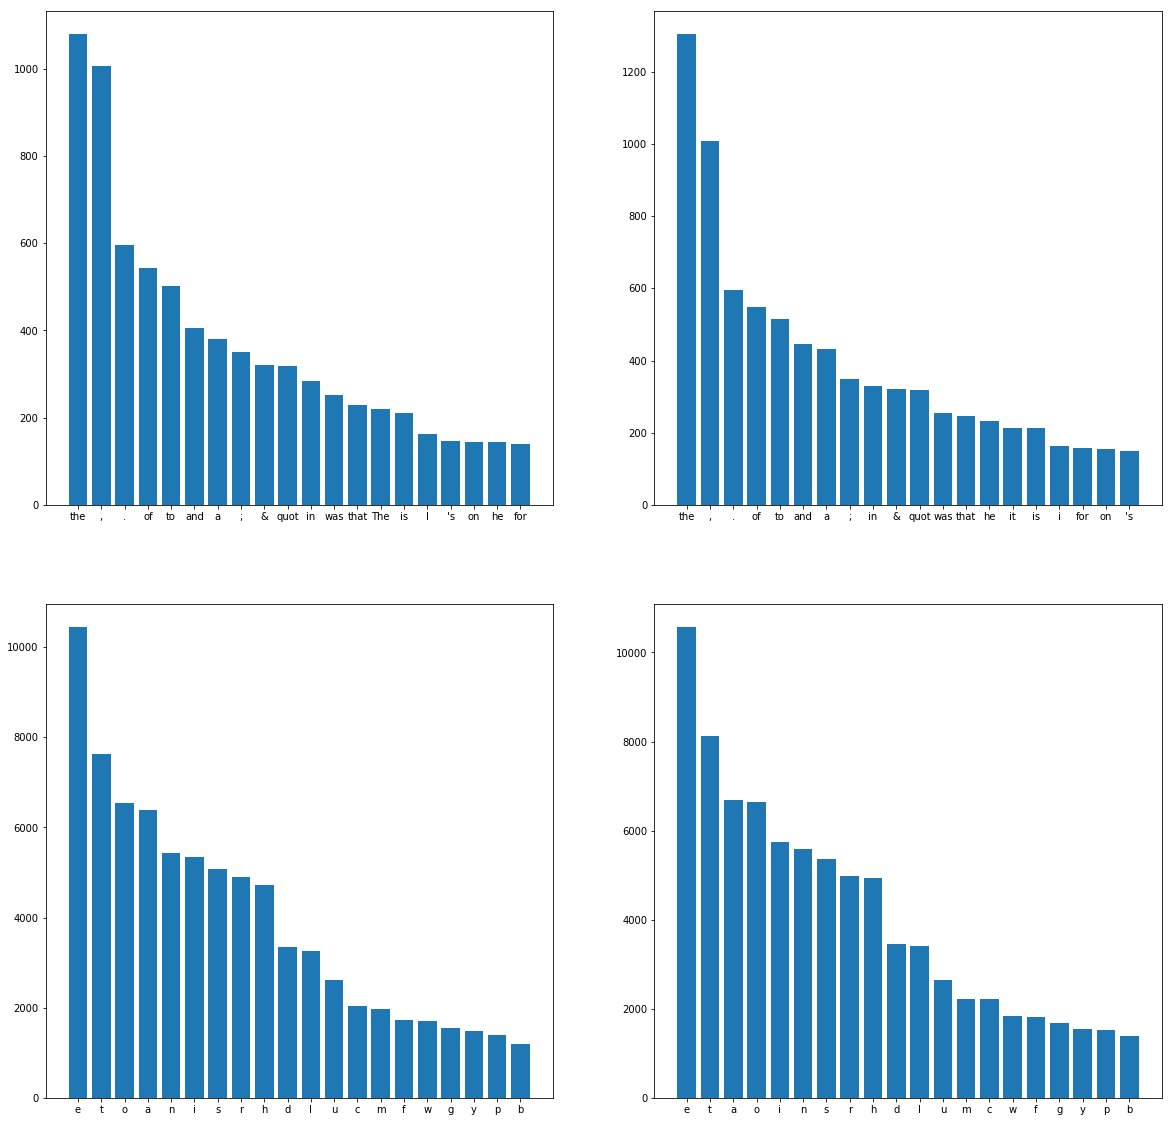

In [245]:
plt.figure(figsize=(20, 20))
for i, col in enumerate([all_tokens, all_lower_tokens, all_chars, all_lower_chars]):
    plt.subplot(2, 2, i+1)
    plot_most_common(col)

In [243]:
print(list(all_lower_chars.keys()))
print(list(all_chars.keys()))

['a', 'm', 'o', 'v', 'e', 't', 's', 'p', 'r', '.', 'g', 'i', 'k', 'l', 'f', 'n', 'y', 'b', 'u', 'h', '-', 'w', ',', 'j', '0', 'c', '1', '9', '5', '8', '3', 'd', "'", '(', '2', '&', 'q', ';', 'x', ':', '4', ')', 'z', '6', '!', '?', '`', '7', '*', '/', '+']
['A', 'M', 'O', 'V', 'E', 't', 'o', 's', 'p', 'r', '.', 'G', 'a', 'i', 'k', 'e', 'l', 'f', 'm', 'n', 'g', 'y', 'L', 'b', 'u', 'P', 'T', 'h', '-', 'w', ',', 'j', '0', 'S', 'c', '1', '9', '5', '8', '3', 'd', 'v', 'D', 'K', "'", 'U', 'N', 'I', '(', '2', 'R', 'F', 'H', 'C', 'Y', 'W', 'B', '&', 'q', ';', 'x', ':', '4', 'J', ')', 'z', '6', 'Q', 'X', '!', '?', '`', '7', '*', 'Z', '/', '+']


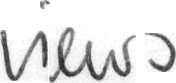

In [40]:
# str(all_lower_tokens)
from PIL import Image
Image.open('../../data/raw/word_level/b01/b01-127/b01-127-00-01.png')

In [9]:
import os

def absoluteFilePaths(directory):
    for dirpath,_,filenames in os.walk(directory):
        for f in filenames:
#             yield os.path.abspath(os.path.join(dirpath, f))
            yield os.path.join(dirpath, f)
            
for i in absoluteFilePaths('../../data/raw/word_level'):
    print(i)

../../data/raw/word_level/e07/e07-094/e07-094-02-07.png
../../data/raw/word_level/e07/e07-094/e07-094-01-00.png
../../data/raw/word_level/e07/e07-094/e07-094-03-01.png
../../data/raw/word_level/e07/e07-094/e07-094-02-04.png
../../data/raw/word_level/e07/e07-094/e07-094-06-08.png
../../data/raw/word_level/e07/e07-094/e07-094-00-04.png
../../data/raw/word_level/e07/e07-094/e07-094-00-05.png
../../data/raw/word_level/e07/e07-094/e07-094-06-02.png
../../data/raw/word_level/e07/e07-094/e07-094-00-08.png
../../data/raw/word_level/e07/e07-094/e07-094-03-08.png
../../data/raw/word_level/e07/e07-094/e07-094-03-05.png
../../data/raw/word_level/e07/e07-094/e07-094-03-02.png
../../data/raw/word_level/e07/e07-094/e07-094-06-09.png
../../data/raw/word_level/e07/e07-094/e07-094-06-01.png
../../data/raw/word_level/e07/e07-094/e07-094-06-03.png
../../data/raw/word_level/e07/e07-094/e07-094-00-07.png
../../data/raw/word_level/e07/e07-094/e07-094-01-09.png
../../data/raw/word_level/e07/e07-094/e07-094-04

../../data/raw/word_level/l07/l07-052/l07-052-04-00.png
../../data/raw/word_level/l07/l07-052/l07-052-03-09.png
../../data/raw/word_level/l07/l07-052/l07-052-04-02.png
../../data/raw/word_level/l07/l07-052/l07-052-00-00.png
../../data/raw/word_level/l07/l07-052/l07-052-01-01.png
../../data/raw/word_level/l07/l07-052/l07-052-01-10.png
../../data/raw/word_level/l07/l07-052/l07-052-03-02.png
../../data/raw/word_level/l07/l07-052/l07-052-01-04.png
../../data/raw/word_level/l07/l07-052/l07-052-01-11.png
../../data/raw/word_level/l07/l07-052/l07-052-00-04.png
../../data/raw/word_level/l07/l07-052/l07-052-01-07.png
../../data/raw/word_level/l07/l07-052/l07-052-01-18.png
../../data/raw/word_level/l07/l07-052/l07-052-02-08.png
../../data/raw/word_level/l07/l07-052/l07-052-02-06.png
../../data/raw/word_level/l07/l07-052/l07-052-01-09.png
../../data/raw/word_level/l07/l07-052/l07-052-01-17.png
../../data/raw/word_level/l07/l07-052/l07-052-00-16.png
../../data/raw/word_level/l07/l07-052/l07-052-02

../../data/raw/word_level/r02/r02-010/r02-010-07-04.png
../../data/raw/word_level/r02/r02-010/r02-010-03-02.png
../../data/raw/word_level/r02/r02-010/r02-010-05-06.png
../../data/raw/word_level/r02/r02-010/r02-010-04-01.png
../../data/raw/word_level/r02/r02-010/r02-010-02-02.png
../../data/raw/word_level/r02/r02-010/r02-010-01-02.png
../../data/raw/word_level/r02/r02-010/r02-010-03-09.png
../../data/raw/word_level/r02/r02-010/r02-010-07-03.png
../../data/raw/word_level/r02/r02-010/r02-010-05-00.png
../../data/raw/word_level/r02/r02-010/r02-010-04-02.png
../../data/raw/word_level/r02/r02-010/r02-010-05-03.png
../../data/raw/word_level/r02/r02-010/r02-010-05-01.png
../../data/raw/word_level/r02/r02-010/r02-010-00-07.png
../../data/raw/word_level/r02/r02-010/r02-010-06-06.png
../../data/raw/word_level/r02/r02-010/r02-010-01-04.png
../../data/raw/word_level/r02/r02-010/r02-010-03-08.png
../../data/raw/word_level/r02/r02-010/r02-010-04-03.png
../../data/raw/word_level/r02/r02-010/r02-010-05

../../data/raw/word_level/m04/m04-043/m04-043-02-04.png
../../data/raw/word_level/m04/m04-043/m04-043-00-05.png
../../data/raw/word_level/m04/m04-043/m04-043-02-12.png
../../data/raw/word_level/m04/m04-043/m04-043-00-13.png
../../data/raw/word_level/m04/m04-043/m04-043-00-19.png
../../data/raw/word_level/m04/m04-043/m04-043-01-01.png
../../data/raw/word_level/m04/m04-043/m04-043-03-06.png
../../data/raw/word_level/m04/m04-043/m04-043-01-15.png
../../data/raw/word_level/m04/m04-043/m04-043-02-05.png
../../data/raw/word_level/m04/m04-043/m04-043-02-16.png
../../data/raw/word_level/m04/m04-043/m04-043-00-12.png
../../data/raw/word_level/m04/m04-043/m04-043-01-02.png
../../data/raw/word_level/m04/m04-043/m04-043-04-00.png
../../data/raw/word_level/m04/m04-043/m04-043-03-00.png
../../data/raw/word_level/m04/m04-043/m04-043-03-07.png
../../data/raw/word_level/m04/m04-043/m04-043-01-06.png
../../data/raw/word_level/m04/m04-043/m04-043-01-16.png
../../data/raw/word_level/m04/m04-043/m04-043-02

../../data/raw/word_level/c02/c02-007/c02-007-06-08.png
../../data/raw/word_level/c02/c02-007/c02-007-07-07.png
../../data/raw/word_level/c02/c02-007/c02-007-02-07.png
../../data/raw/word_level/c02/c02-007/c02-007-00-00.png
../../data/raw/word_level/c02/c02-007/c02-007-08-04.png
../../data/raw/word_level/c02/c02-007/c02-007-05-05.png
../../data/raw/word_level/c02/c02-007/c02-007-08-00.png
../../data/raw/word_level/c02/c02-007/c02-007-00-02.png
../../data/raw/word_level/c02/c02-007/c02-007-04-03.png
../../data/raw/word_level/c02/c02-007/c02-007-03-08.png
../../data/raw/word_level/c02/c02-007/c02-007-01-01.png
../../data/raw/word_level/c02/c02-007/c02-007-07-02.png
../../data/raw/word_level/c02/c02-007/c02-007-03-07.png
../../data/raw/word_level/c02/c02-007/c02-007-05-02.png
../../data/raw/word_level/c02/c02-007/c02-007-02-04.png
../../data/raw/word_level/c02/c02-007/c02-007-07-06.png
../../data/raw/word_level/c02/c02-007/c02-007-07-09.png
../../data/raw/word_level/c02/c02-007/c02-007-02

../../data/raw/word_level/n04/n04-171/n04-171-02-12.png
../../data/raw/word_level/n04/n04-171/n04-171-03-00.png
../../data/raw/word_level/n04/n04-171/n04-171-03-10.png
../../data/raw/word_level/n04/n04-171/n04-171-00-02.png
../../data/raw/word_level/n04/n04-171/n04-171-01-05.png
../../data/raw/word_level/n04/n04-171/n04-171-03-13.png
../../data/raw/word_level/n04/n04-171/n04-171-06-01.png
../../data/raw/word_level/n04/n04-171/n04-171-00-00.png
../../data/raw/word_level/n04/n04-171/n04-171-06-06.png
../../data/raw/word_level/n04/n04-171/n04-171-02-09.png
../../data/raw/word_level/n04/n04-171/n04-171-01-03.png
../../data/raw/word_level/n04/n04-171/n04-171-04-02.png
../../data/raw/word_level/n04/n04-171/n04-171-00-01.png
../../data/raw/word_level/n04/n04-171/n04-171-05-03.png
../../data/raw/word_level/n04/n04-171/n04-171-04-03.png
../../data/raw/word_level/n04/n04-171/n04-171-02-01.png
../../data/raw/word_level/n04/n04-171/n04-171-04-06.png
../../data/raw/word_level/n04/n04-171/n04-171-05

../../data/raw/word_level/g06/g06-050l/g06-050l-03-05.png
../../data/raw/word_level/g06/g06-050l/g06-050l-00-05.png
../../data/raw/word_level/g06/g06-050l/g06-050l-04-07.png
../../data/raw/word_level/g06/g06-050l/g06-050l-05-03.png
../../data/raw/word_level/g06/g06-050l/g06-050l-00-04.png
../../data/raw/word_level/g06/g06-050l/g06-050l-00-00.png
../../data/raw/word_level/g06/g06-050l/g06-050l-03-02.png
../../data/raw/word_level/g06/g06-050l/g06-050l-07-10.png
../../data/raw/word_level/g06/g06-050l/g06-050l-03-03.png
../../data/raw/word_level/g06/g06-050l/g06-050l-04-03.png
../../data/raw/word_level/g06/g06-050l/g06-050l-07-00.png
../../data/raw/word_level/g06/g06-050l/g06-050l-07-02.png
../../data/raw/word_level/g06/g06-050l/g06-050l-02-01.png
../../data/raw/word_level/g06/g06-050l/g06-050l-02-00.png
../../data/raw/word_level/g06/g06-050l/g06-050l-01-08.png
../../data/raw/word_level/g06/g06-050l/g06-050l-00-02.png
../../data/raw/word_level/g06/g06-050l/g06-050l-03-00.png
../../data/raw

../../data/raw/word_level/g06/g06-105/g06-105-01-08.png
../../data/raw/word_level/g06/g06-105/g06-105-02-06.png
../../data/raw/word_level/g06/g06-105/g06-105-06-01.png
../../data/raw/word_level/g06/g06-105/g06-105-05-01.png
../../data/raw/word_level/g06/g06-105/g06-105-05-05.png
../../data/raw/word_level/g06/g06-105/g06-105-05-08.png
../../data/raw/word_level/g06/g06-105/g06-105-03-01.png
../../data/raw/word_level/g06/g06-105/g06-105-01-04.png
../../data/raw/word_level/g06/g06-105/g06-105-03-03.png
../../data/raw/word_level/g06/g06-105/g06-105-03-07.png
../../data/raw/word_level/g06/g06-115/g06-115-04-03.png
../../data/raw/word_level/g06/g06-115/g06-115-03-07.png
../../data/raw/word_level/g06/g06-115/g06-115-04-04.png
../../data/raw/word_level/g06/g06-115/g06-115-04-00.png
../../data/raw/word_level/g06/g06-115/g06-115-03-08.png
../../data/raw/word_level/g06/g06-115/g06-115-00-03.png
../../data/raw/word_level/g06/g06-115/g06-115-01-07.png
../../data/raw/word_level/g06/g06-115/g06-115-04

../../data/raw/word_level/d04/d04-096/d04-096-03-08.png
../../data/raw/word_level/d04/d04-096/d04-096-02-13.png
../../data/raw/word_level/d04/d04-096/d04-096-05-09.png
../../data/raw/word_level/d04/d04-096/d04-096-01-10.png
../../data/raw/word_level/d04/d04-096/d04-096-00-02.png
../../data/raw/word_level/d04/d04-096/d04-096-03-04.png
../../data/raw/word_level/d04/d04-096/d04-096-04-09.png
../../data/raw/word_level/d04/d04-096/d04-096-03-06.png
../../data/raw/word_level/d04/d04-096/d04-096-04-07.png
../../data/raw/word_level/d04/d04-096/d04-096-01-03.png
../../data/raw/word_level/d04/d04-096/d04-096-05-12.png
../../data/raw/word_level/d04/d04-096/d04-096-01-09.png
../../data/raw/word_level/d04/d04-096/d04-096-06-01.png
../../data/raw/word_level/d04/d04-096/d04-096-06-05.png
../../data/raw/word_level/d04/d04-096/d04-096-05-00.png
../../data/raw/word_level/d04/d04-096/d04-096-02-00.png
../../data/raw/word_level/d04/d04-096/d04-096-06-08.png
../../data/raw/word_level/d04/d04-096/d04-096-00

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



../../data/raw/word_level/b06/b06-049/b06-049-02-03.png
../../data/raw/word_level/b06/b06-049/b06-049-03-01.png
../../data/raw/word_level/b06/b06-049/b06-049-09-00.png
../../data/raw/word_level/b06/b06-049/b06-049-09-04.png
../../data/raw/word_level/b06/b06-049/b06-049-00-06.png
../../data/raw/word_level/b06/b06-049/b06-049-09-06.png
../../data/raw/word_level/b06/b06-049/b06-049-07-03.png
../../data/raw/word_level/b06/b06-049/b06-049-09-03.png
../../data/raw/word_level/b06/b06-049/b06-049-06-03.png
../../data/raw/word_level/b06/b06-049/b06-049-03-05.png
../../data/raw/word_level/b06/b06-049/b06-049-04-02.png
../../data/raw/word_level/b06/b06-049/b06-049-02-07.png
../../data/raw/word_level/b06/b06-049/b06-049-08-01.png
../../data/raw/word_level/b06/b06-049/b06-049-07-01.png
../../data/raw/word_level/b06/b06-049/b06-049-03-00.png
../../data/raw/word_level/b06/b06-049/b06-049-02-01.png
../../data/raw/word_level/b06/b06-049/b06-049-06-05.png
../../data/raw/word_level/b06/b06-049/b06-049-08

../../data/raw/word_level/d06/d06-082/d06-082-02-07.png
../../data/raw/word_level/d06/d06-082/d06-082-00-03.png
../../data/raw/word_level/d06/d06-082/d06-082-04-10.png
../../data/raw/word_level/d06/d06-082/d06-082-04-05.png
../../data/raw/word_level/d06/d06-082/d06-082-01-10.png
../../data/raw/word_level/d06/d06-082/d06-082-02-11.png
../../data/raw/word_level/d06/d06-082/d06-082-05-00.png
../../data/raw/word_level/d06/d06-082/d06-082-01-01.png
../../data/raw/word_level/d06/d06-082/d06-082-04-01.png
../../data/raw/word_level/d06/d06-082/d06-082-03-03.png
../../data/raw/word_level/d06/d06-082/d06-082-05-01.png
../../data/raw/word_level/d06/d06-082/d06-082-03-04.png
../../data/raw/word_level/d06/d06-082/d06-082-00-10.png
../../data/raw/word_level/d06/d06-082/d06-082-00-05.png
../../data/raw/word_level/d06/d06-082/d06-082-01-09.png
../../data/raw/word_level/d06/d06-104/d06-104-06-05.png
../../data/raw/word_level/d06/d06-104/d06-104-08-01.png
../../data/raw/word_level/d06/d06-104/d06-104-01

../../data/raw/word_level/p03/p03-029/p03-029-02-00.png
../../data/raw/word_level/p03/p03-029/p03-029-05-04.png
../../data/raw/word_level/p03/p03-029/p03-029-00-05.png
../../data/raw/word_level/p03/p03-029/p03-029-04-04.png
../../data/raw/word_level/p03/p03-029/p03-029-01-00.png
../../data/raw/word_level/p03/p03-029/p03-029-00-08.png
../../data/raw/word_level/p03/p03-029/p03-029-08-01.png
../../data/raw/word_level/p03/p03-029/p03-029-06-00.png
../../data/raw/word_level/p03/p03-029/p03-029-04-00.png
../../data/raw/word_level/p03/p03-029/p03-029-04-07.png
../../data/raw/word_level/p03/p03-029/p03-029-03-02.png
../../data/raw/word_level/p03/p03-029/p03-029-04-01.png
../../data/raw/word_level/p03/p03-029/p03-029-03-00.png
../../data/raw/word_level/p03/p03-029/p03-029-09-01.png
../../data/raw/word_level/p03/p03-029/p03-029-09-05.png
../../data/raw/word_level/p03/p03-029/p03-029-00-02.png
../../data/raw/word_level/p03/p03-029/p03-029-07-03.png
../../data/raw/word_level/p03/p03-029/p03-029-05

../../data/raw/word_level/a03/a03-071/a03-071-06-03.png
../../data/raw/word_level/a03/a03-071/a03-071-08-00.png
../../data/raw/word_level/a03/a03-071/a03-071-00-00.png
../../data/raw/word_level/a03/a03-071/a03-071-07-02.png
../../data/raw/word_level/a03/a03-071/a03-071-07-06.png
../../data/raw/word_level/a03/a03-071/a03-071-08-04.png
../../data/raw/word_level/a03/a03-071/a03-071-01-04.png
../../data/raw/word_level/a03/a03-071/a03-071-00-04.png
../../data/raw/word_level/a03/a03-071/a03-071-05-00.png
../../data/raw/word_level/a03/a03-071/a03-071-03-00.png
../../data/raw/word_level/a03/a03-071/a03-071-01-06.png
../../data/raw/word_level/a03/a03-071/a03-071-00-05.png
../../data/raw/word_level/a03/a03-071/a03-071-03-07.png
../../data/raw/word_level/a03/a03-071/a03-071-04-00.png
../../data/raw/word_level/a03/a03-071/a03-071-00-07.png
../../data/raw/word_level/a03/a03-071/a03-071-03-09.png
../../data/raw/word_level/a03/a03-071/a03-071-02-05.png
../../data/raw/word_level/a03/a03-071/a03-071-07

../../data/raw/word_level/h06/h06-085/h06-085-07-06.png
../../data/raw/word_level/h06/h06-085/h06-085-04-03.png
../../data/raw/word_level/h06/h06-085/h06-085-10-02.png
../../data/raw/word_level/h06/h06-085/h06-085-09-00.png
../../data/raw/word_level/h06/h06-085/h06-085-04-01.png
../../data/raw/word_level/h06/h06-085/h06-085-09-06.png
../../data/raw/word_level/h06/h06-085/h06-085-03-02.png
../../data/raw/word_level/h06/h06-085/h06-085-05-04.png
../../data/raw/word_level/h06/h06-085/h06-085-01-04.png
../../data/raw/word_level/h06/h06-085/h06-085-00-03.png
../../data/raw/word_level/h06/h06-085/h06-085-02-04.png
../../data/raw/word_level/h06/h06-085/h06-085-04-04.png
../../data/raw/word_level/h06/h06-085/h06-085-10-06.png
../../data/raw/word_level/h06/h06-085/h06-085-10-04.png
../../data/raw/word_level/h06/h06-085/h06-085-08-05.png
../../data/raw/word_level/h06/h06-085/h06-085-07-05.png
../../data/raw/word_level/h06/h06-085/h06-085-06-04.png
../../data/raw/word_level/h06/h06-085/h06-085-08

In [1]:
!cat ../../data/raw/xml/b01-127.xml

<?xml version="1.0" encoding="ISO-8859-1"?>

<!DOCTYPE form SYSTEM 'http://www.iam.unibe.ch/~fki/iamdb/form-metadata.dtd'>

<form created="2002-01-14" height="3542" id="b01-127" last-modified="2002-07-17" skew="127" status="final" version="3.0_beta" width="2479" writer-id="094">
  <machine-printed-part>
    <machine-print-line text="The views of the Archbishop, who has maintained an unflinching witness to what" />
    <machine-print-line text="Christianity really means, must carry weight. But what, in fact, can the other" />
    <machine-print-line text="Commonwealth countries do to bring support and comfort to this gallant minority?" />
    <machine-print-line text="THERE is no evidence that the policy of appeasement has modified the actions of the" />
    <machine-print-line text="Nationalists. On the contrary, apartheid is being applied ever more ruthlessly." />
  </machine-printed-part>
  <handwritten-part>
    <line ass="322" asx="0" asy="729" character-width="999" dss="322" dsx="

In [40]:
from glob import glob

def get_structed_data(data_path):
    all_data = {}
    for filename in glob(data_path):
        tree = ET.parse(filename)
        root = tree.getroot()
        tmp = []
        ids = []
        pos_tag = []
        writer_id = root.attrib['writer-id']
            
        for part in root.findall('handwritten-part'):
            for line in part.findall('line'):
                for word in line.findall('word'):
                    tmp.append(word.attrib['text'].rstrip())
                    ids.append(word.attrib['id'].rstrip())
                    pos_tag.append(word.attrib['tag'].rstrip())
#                     print(word.attrib)
#         all_data[filename.split('/')[-1].split('.')[0]] = [tmp]
#         print(len(tmp), len(ids))
        assert(len(tmp) == len(ids) == len(pos_tag))
        all_data[filename.split('/')[-1].split('.')[0]] = [tmp, ids, pos_tag]
#         print(all_data)
    return all_data


def create_dataframe(all_data):
    dat = pd.DataFrame(all_data).T.reset_index()
    dat.columns = ['filename', 'meta', 'ids', 'pos_tag']
    dat['folder'] = dat.filename.map(lambda x: x.split('-')[0])
    dat['meta'] = dat.meta.map(lambda x: np.array([i.replace('&quot;', '"') for i in x]))
    dat['document'] = dat.filename.map(lambda x: re.sub(r'[A-Za-z]', '', x.split('-')[-1]))
    dat['document'] = dat['folder'] + '-' + dat['document']
    return dat


data_path = '../../data/raw/xml/*'
all_data = get_structed_data(data_path)
dat = create_dataframe(all_data)
# to CSV 
# dat.to_csv('../../data/preprocessed/meta.csv', index=False)
# dat.to_json('../../data/preprocessed/meta.json')

000
001
002
000
003
004
000
003
005
000
006
007
000
008
009
000
010
009
000
008
005
000
010
007
011
012
000
011
012
000
000
013
000
014
013
000
014
013
000
015
000
000
001
016
000
000
017
000
016
000
000
016
000
018
000
018
000
019
000
019
000
019
000
020
000
000
021
022
023
024
025
025
025
025
025
026
026
027
028
029
030
031
032
033
034
035
036
026
026
026
037
037
037
038
039
037
040
041
042
043
044
045
046
047
048
049
050
051
052
037
000
053
054
055
056
000
000
000
000
058
058
058
058
059
059
059
059
060
060
060
060
061
061
061
061
062
062
062
063
063
063
064
064
064
064
000
065
065
000
000
000
000
000
000
000
000
000
000
000
000
000
000
000
000
000
000
000
000
000
000
000
000
066
066
067
068
069
070
071
072
073
074
075
076
077
078
079
080
081
082
083
084
085
084
085
085
085
086
085
087
087
087
088
088
088
089
089
089
090
090
090
017
017
091
091
092
092
092
093
093
093
094
094
094
095
095
096
097
098
099
100
102
102
103
104
105
106
107
107
107
107
108
108
108
108
109
109
109
109
110


In [36]:
dat.head()

filename                                               meta  \
0  a01-000u  [A, MOVE, to, stop, Mr., Gaitskell, from, nomi...   
1  a01-000x  [A, MOVE, to, stop, Mr., Gaitskell, from, nomi...   
2   a01-003  [Though, they, may, gather, some, Left-wing, s...   
3  a01-003u  [Though, they, may, gather, some, Left-wing, s...   
4  a01-003x  [Though, they, may, gather, some, Left-wing, s...   

                                                 ids  \
0  [a01-000u-00-00, a01-000u-00-01, a01-000u-00-0...   
1  [a01-000x-00-00, a01-000x-00-01, a01-000x-00-0...   
2  [a01-003-00-00, a01-003-00-01, a01-003-00-02, ...   
3  [a01-003u-00-00, a01-003u-00-01, a01-003u-00-0...   
4  [a01-003x-00-00, a01-003x-00-01, a01-003x-00-0...   

                                             pos_tag folder document  
0  [AT, NN, TO, VB, NPT, NP, IN, VBG, DTI, AP, NN...    a01  a01-000  
1  [AT, NN, TO, VB, NPT, NP, IN, VBG, DTI, AP, NN...    a01  a01-000  
2  [CS, PP3AS, MD, VB, DTI, JJB, NN, ,, AT, JJ, N...    a01  a01-003  
3  [CS, PP3AS, MD, VB, DTI, JJB, NN, ,, AT, JJ, N...    a01  a01-003  
4  [CS, PP3AS, MD, VB, DTI, JJB, NN, ,, AT, JJ, N...    a01  a01-003